<h1><center>Algoritmi u teoriji brojeva</center></h1>
<h1><center>Zadaća 1</center></h1>
<h3><center>Mihael Petrinjak</center></h3>

## Zadatak 1.
Funkcija $f(n) = ln^{24} n$ je *blagog rasta*, a $g(n) = n^5$ je *polinomnog*. Znači da postoji $N \in \mathbb{N}$ nakon kojeg je $|f(n)| < |g(n)|$.


In [167]:
import numpy as np
import matplotlib.pyplot as pl

Evaluiram funkciju $h(n) = f(n) - g(n)$ u nekim točkama segmenta $[1,500 000]$. Zadnji broj za koji je $h>0$ je traženi broj.

In [168]:
def h(n) :
    return np.log(n)**24 - n**5

evaluacija = np.array([[n, h(n)] for n in range(1,500_000,10_000)])

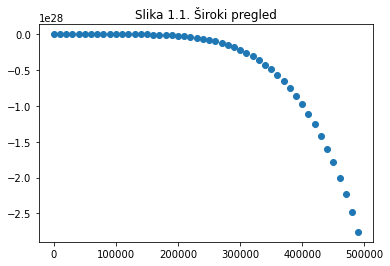

In [169]:
pl.scatter(evaluacija[:,0], evaluacija[:,1])
_ = pl.title("Slika 1.1. Široki pregled")

Izgleda kao da $h$ nakon $500000$ više ne raste.

In [170]:
mask = evaluacija[:,1] > np.array((0,))
x = evaluacija[:,0]
mask_pairs = [(x[i],mask[i]) for i in range(len(x))]
print(mask_pairs[0:30])

[(1.0, False), (10001.0, True), (20001.0, True), (30001.0, True), (40001.0, True), (50001.0, True), (60001.0, True), (70001.0, True), (80001.0, True), (90001.0, True), (100001.0, True), (110001.0, True), (120001.0, True), (130001.0, True), (140001.0, True), (150001.0, False), (160001.0, False), (170001.0, False), (180001.0, False), (190001.0, False), (200001.0, False), (210001.0, False), (220001.0, False), (230001.0, False), (240001.0, False), (250001.0, False), (260001.0, False), (270001.0, False), (280001.0, False), (290001.0, False)]


Varijabla ```mask``` je boolean vektor koji za točke u kojima evaluiramo kaže je li funkcija veća od nule.

In [171]:
indeks = 0
for i in range(len(evaluacija)) :
    if mask[i] == True :
        indeks = i
print(x[indeks:indeks+2])

[140001. 150001.]


Inicijalnom analizom sam potražio najdesniji interval čija desna ograda je $500000$ unutar kojeg $h(n)$ mijenja predznak. Slutim da je traženi broj u $[140 001,150 001]$.

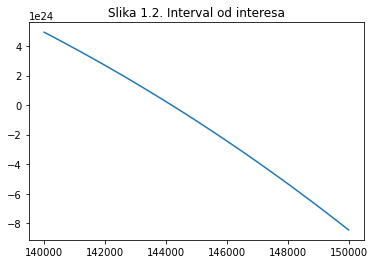

In [172]:
subdivizija = np.linspace(140_000,150000)
vrijednosti = np.array([h(n) for n in subdivizija])
pl.plot(subdivizija, vrijednosti)
_ = pl.title("Slika 1.2. Interval od interesa")

Implementiram algoritam koji će binarnim pretraživanjem pronaći najdesniju točku u kojoj neprekidno proširenje od $h(x), x\in \mathbb{R}$ poprima vrijednost $0$.

In [173]:
def nula(h, l, d, greska) :
    if d - l < greska : 
        return (l,d)
    m = ( l + d ) / 2
    # pretpostavka je da je padajuća funkcija
    if h(m) > 0 :
        return nula(h, m, d, greska)
    else :
        return nula(h, l, m, greska)

In [174]:
rez = nula(h, 140001, 150001, 2)
cijeli = np.floor(rez)

print("Traženi interval je:", rez)
print("Zaokružene granice na cijele brojeve:", cijeli)
print("Vrijednost funkcije f u lijevom i densom rubu:\n", h(cijeli[0]), "," , h(cijeli[1]))

Traženi interval je: (144183.12890625, 144184.349609375)
Zaokružene granice na cijele brojeve: [144183. 144184.]
Vrijednost funkcije f u lijevom i densom rubu:
 7.565952214343426e+20 , -5.3112003486034585e+20


Dakle, najveći prirodni broj za koji vrijedi zadani uvjet je $144 183$.

## Zadatak 2.
Isto kao u prvom zadatku definiram funkciju $g(n) = e^{\sqrt{\ln n}} - \sqrt[7]{n}$ i promatram pozitivnost.

In [175]:
def g(n) :
    return np.e**np.sqrt( np.log(n) ) - np.power(n,1/7)

Evaluiram funkciju na velikoj domeni kako bih dobio osjećaj za njeno ponašanje.

Druga točka subdivizije je 2.0408163265306123e+20 .


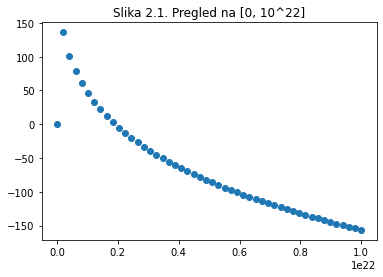

In [176]:
domena = np.linspace(1,10**22)
g_vr = np.array([g(n) for n in domena])
pl.scatter(domena, g_vr)
_ = pl.title("Slika 2.1. Pregled na [0, 10^22]")
print("Druga točka subdivizije je", domena[1], ".")

Čini se da je funkcija $g$ padajuća nakon druge točke subdivizije.

In [177]:
y1 = g(np.power(10,21,dtype=np.longdouble))
y2 = g(np.power(10,22,dtype=np.longdouble))

print("U 10^21 g je pozitivna: ", y1, ",")
print("a u 10^22 je negativna: ", y2)

U 10^21 g je pozitivna:  47.04237411637689 ,
a u 10^22 je negativna:  -156.29990177307627


Dakle, najveći prirodni broj koji zadovoljava uvjet zadatka je između $10^{21}$ i $10^{22}$ i ima 22 znamenke.

## Zadatak 3.

Definiram funkciju koja predstavlja algoritam "*Ima li prirodan broj $N$ netrivijalan faktor $M$ takav da je $2 \leq M \leq k$?*".

In [178]:
def L2(N, k) :
    for i in range(2, k+1) :
        if N % i == 0 : return True
    return False

Sljedeći algoritam vraća listu `L` sa znamenkama traženog faktora zapisanog u binarnoj bazi. `L[j]` je znamenka uz $2^j$.

In [179]:
def L1(N) :
    
    # pronađi prvi k i broj bitova n
    n = 0
    while 2**(n+1) < N : n += 1
    k = 2**n - 1
    n += 1
    
    # provjera prostosti
    if not L2(N, k) :
        print(f"Broj {N} je prost.")
        return
    
    # inicijalizacija binarnog zapisa traženog broja
    # zapis[j] je znamenka uz 2^(j)
    zapis = (n-1)*[0]
    zapis[n-2] = 1
    j = n-2
    
    # glavna petlja
    while j >= 0 :
        
        k = sum([zapis[i]*(2**i) for i in range(len(zapis))]) - 1
        out = L2(N, k)
        
        if out : zapis[j] = 0
        else : zapis[j] = 1
            
        out = "DA" if out else "NE"
        print(f"k je {k}. L2 vraća {out}. Binarni zapis je {zapis}.")
            
        if j > 0 : zapis[j-1] = 1
        j -= 1
        
    return zapis

Provjeravam ispravnost algoritma na primjeru iz skripte.

In [180]:
zapis_faktora = L1(91)

faktor = sum([zapis_faktora[i]*(2**i) for i in range(len(zapis_faktora))])
print(f"Traženi faktor od 91 je {faktor}.")

k je 31. L2 vraća DA. Binarni zapis je [0, 0, 0, 0, 0, 0].
k je 15. L2 vraća DA. Binarni zapis je [0, 0, 0, 0, 0, 0].
k je 7. L2 vraća DA. Binarni zapis je [0, 0, 0, 0, 0, 0].
k je 3. L2 vraća NE. Binarni zapis je [0, 0, 1, 0, 0, 0].
k je 5. L2 vraća NE. Binarni zapis je [0, 1, 1, 0, 0, 0].
k je 6. L2 vraća NE. Binarni zapis je [1, 1, 1, 0, 0, 0].
Traženi faktor od 91 je 7.


Rješenje zadatka.

In [181]:
zapis_faktora = L1(299)

faktor = sum([zapis_faktora[i]*(2**i) for i in range(len(zapis_faktora))])
print(f"Traženi faktor od 299 je {faktor}.")

k je 127. L2 vraća DA. Binarni zapis je [0, 0, 0, 0, 0, 0, 0, 0].
k je 63. L2 vraća DA. Binarni zapis je [0, 0, 0, 0, 0, 0, 0, 0].
k je 31. L2 vraća DA. Binarni zapis je [0, 0, 0, 0, 0, 0, 0, 0].
k je 15. L2 vraća DA. Binarni zapis je [0, 0, 0, 0, 0, 0, 0, 0].
k je 7. L2 vraća NE. Binarni zapis je [0, 0, 0, 1, 0, 0, 0, 0].
k je 11. L2 vraća NE. Binarni zapis je [0, 0, 1, 1, 0, 0, 0, 0].
k je 13. L2 vraća DA. Binarni zapis je [0, 0, 1, 1, 0, 0, 0, 0].
k je 12. L2 vraća NE. Binarni zapis je [1, 0, 1, 1, 0, 0, 0, 0].
Traženi faktor od 299 je 13.
